In [97]:
import math
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from tensorflow import keras
from keras.layers import Dense, LSTM
from keras.models import Sequential, load_model
import matplotlib.pyplot as plt
from datetime import date
import yfinance as yf
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')


In [98]:
#Get the stock quote

START = "2012-01-01"
currentTime = date.today().strftime("%Y-%m-%d")
next_day =  pd.to_datetime(currentTime) + pd.DateOffset(days = 1)

#LOAD STOCK DATA
def load_data(ticker):
    data = yf.download(ticker,START,next_day)
    return data

# selected_stock = input("Type Ticker Symbol: ")
selected_stock = "AAPL"

data = load_data(selected_stock)
data

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2012-01-03,14.621429,14.732143,14.607143,14.686786,12.519278,302220800
2012-01-04,14.642857,14.810000,14.617143,14.765714,12.586560,260022000
2012-01-05,14.819643,14.948214,14.738214,14.929643,12.726292,271269600
2012-01-06,14.991786,15.098214,14.972143,15.085714,12.859335,318292800
2012-01-09,15.196429,15.276786,15.048214,15.061786,12.838935,394024400
...,...,...,...,...,...,...
2022-12-22,134.350006,134.559998,130.300003,132.229996,132.229996,77852100
2022-12-23,130.919998,132.419998,129.639999,131.860001,131.860001,63771000
2022-12-27,131.380005,131.410004,128.720001,130.029999,130.029999,69007800


In [99]:
#Get number of rows and cols in the df

data.shape

(2767, 6)

Text(0, 0.5, 'Close Price USD ($)')

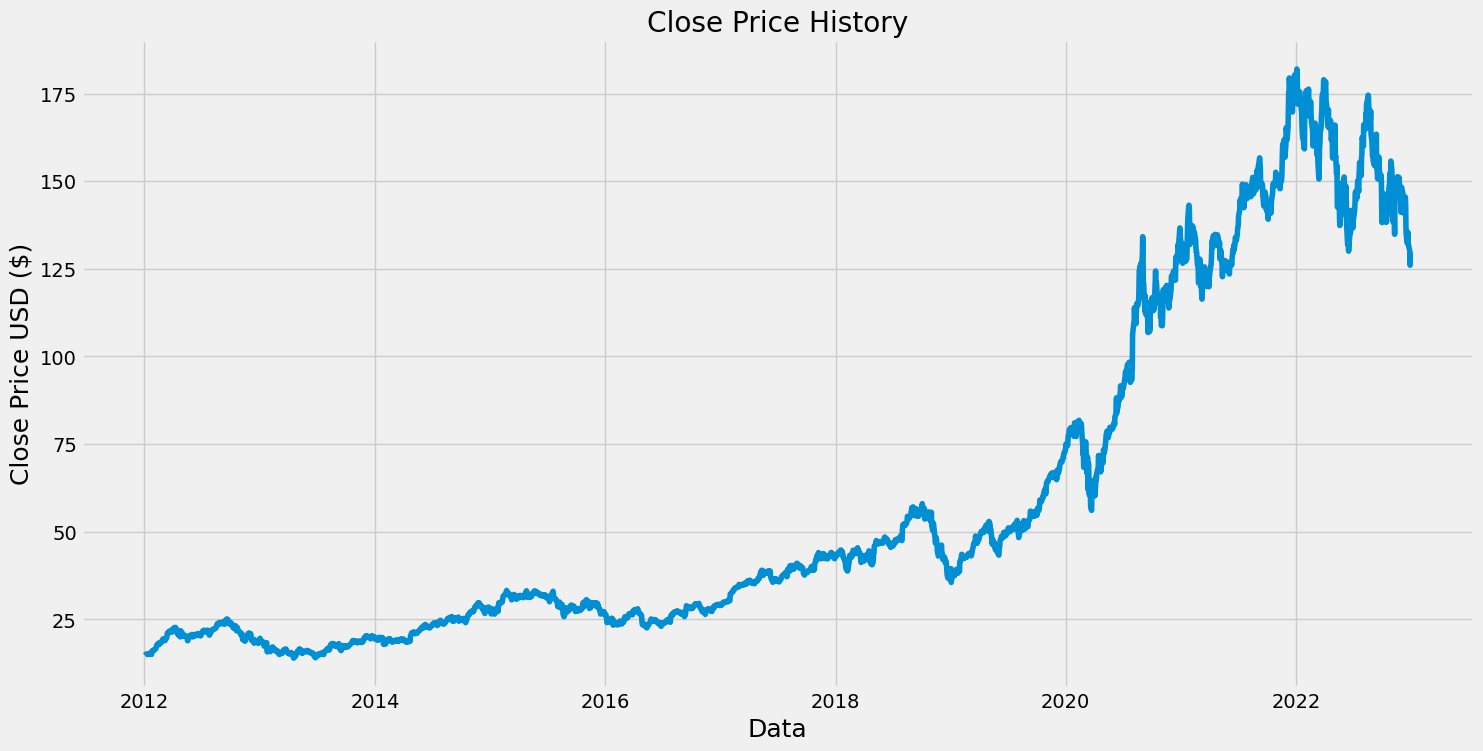

In [100]:
#Visualize the Closing price History

plt.figure(figsize=(16,8))
plt.title("Close Price History")
plt.plot(data["Close"])
plt.xlabel("Data",fontsize = 18)
plt.ylabel("Close Price USD ($)",fontsize=18)

In [101]:
#Create a new DF with only the Close Column



new_data = data.filter(items=['Close'])
print(new_data)
dataset = new_data.values
training_data_len = math.ceil(len(dataset) *0.80)

training_data_len




                 Close
Date                  
2012-01-03   14.686786
2012-01-04   14.765714
2012-01-05   14.929643
2012-01-06   15.085714
2012-01-09   15.061786
...                ...
2022-12-22  132.229996
2022-12-23  131.860001
2022-12-27  130.029999
2022-12-28  126.040001
2022-12-29  129.610001

[2767 rows x 1 columns]


2214

In [102]:
#Scale the data
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)
scaled_data

array([[0.00439887],
       [0.00486851],
       [0.00584391],
       ...,
       [0.69071032],
       [0.66696916],
       [0.68821126]])

In [103]:
#Create the training data

train_data = scaled_data[0:training_data_len,:]

#Split the data into x train and y_train
x_train = []
y_train = []


for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i,0])
    y_train.append(train_data[i,0])
    if i <=60:
        print(x_train)
        print(y_train)
        print()


[array([0.00439887, 0.00486851, 0.00584391, 0.00677256, 0.00663019,
       0.00695107, 0.00680444, 0.00655793, 0.00622217, 0.00726133,
       0.00819848, 0.00790947, 0.0063263 , 0.00783722, 0.00634968,
       0.01192796, 0.01149658, 0.01205972, 0.01327737, 0.01401476,
       0.01395314, 0.01372576, 0.01469479, 0.01560643, 0.01663922,
       0.01830739, 0.02181161, 0.02186474, 0.02381555, 0.02527333,
       0.0227679 , 0.02373267, 0.02371354, 0.02641875, 0.02603411,
       0.026746  , 0.02802528, 0.02873719, 0.03078787, 0.03228178,
       0.03271317, 0.03286405, 0.03030973, 0.02969346, 0.02978484,
       0.03218616, 0.03286193, 0.03431335, 0.03773469, 0.04229932,
       0.04144504, 0.04144716, 0.04474738, 0.04578017, 0.04504489,
       0.04437338, 0.04367423, 0.04599691, 0.04759072, 0.04825798])]
[0.04660893460974819]



In [104]:
#Convert the x_train and the y_train to numpy arrays

x_train, y_train = np.array(x_train),np.array(y_train)


In [105]:
#Reshape the data

x_train = np.reshape(x_train,(x_train.shape[0],x_train.shape[1],1))
x_train.shape


(2154, 60, 1)

In [106]:
#Build LSTM Model
model = Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(x_train.shape[1],1)))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))



In [107]:
#Compile the model

model.compile(optimizer="adam",loss='mean_squared_error')


In [108]:
#Train the model

model.fit(x_train,y_train,batch_size=1,epochs=1)

2022-12-29 21:31:52.153938: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-12-29 21:31:52.422896: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-12-29 21:31:52.547893: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-12-29 21:31:52.662673: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-12-29 21:31:52.847458: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


2154/2154 [==============================] - 68s 31ms/step - loss: 4.5886e-04


In [109]:
#Create the testing dataset
#Create a new array w/ scaled values from indec 1543 to 2003

test_data = scaled_data[training_data_len-60:,:]
#Create the Datasets x_test and y_test

x_test = []
y_test = dataset[training_data_len:,:]

for i in range(60,len(test_data)):
    x_test.append(test_data[i-60:i,0])



In [110]:
#Convert the data to a numpy array

x_test = np.array(x_test)

In [111]:
#Reshape the data
x_test = np.reshape(x_test,(x_test.shape[0],x_test.shape[1],1))




In [112]:
#Get the models predicted price values

predicitons = model.predict(x_test)
predicitons = scaler.inverse_transform(predicitons)

2022-12-29 21:32:59.243942: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-12-29 21:32:59.354010: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


 7/18 [==========>...................] - ETA: 0s

2022-12-29 21:32:59.459568: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


18/18 [==============================] - 1s 24ms/step


In [125]:
#Evaluate the model (RMSE) 0 means the value is exact, if it is close to 0 means it is good
rmse=np.sqrt(np.mean(((predicitons- y_test)**2)))

rmse

4.42513138955265

/var/folders/79/v3tcc8ws06x1ldg_g_by0dsm0000gn/T/ipykernel_96731/3733348345.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid["Predictions"] = predicitons


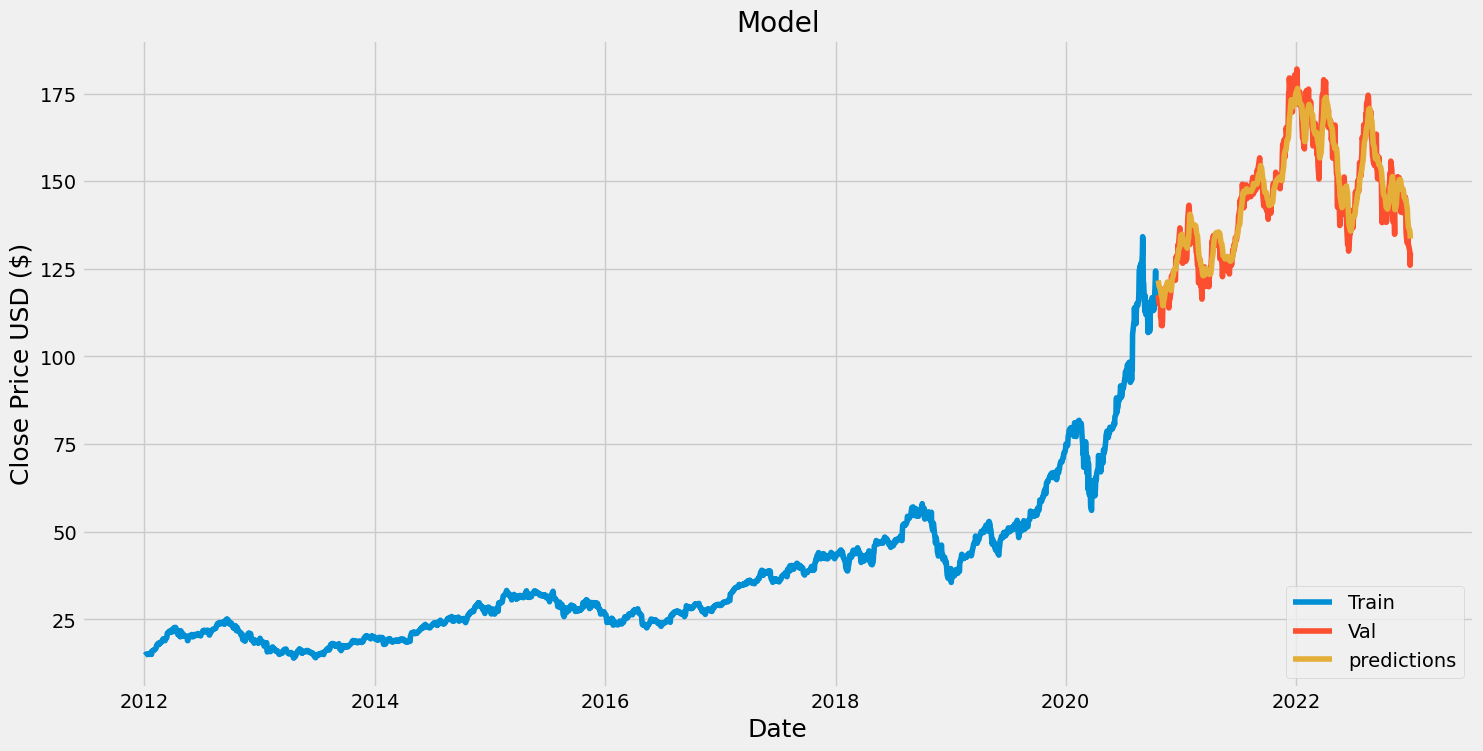

In [114]:
#plot the data

train = data[:training_data_len]
valid = data[training_data_len:]
valid["Predictions"] = predicitons

#Visualize the data

plt.figure(figsize=(16,8))
plt.title("Model")
plt.xlabel("Date",fontsize=18)
plt.ylabel("Close Price USD ($)",fontsize=18)
plt.plot(train["Close"])
plt.plot(valid[["Close","Predictions"]])
plt.legend(['Train',"Val","predictions"],loc="lower right")
plt.show()



In [118]:
#Show valid and predicted price
valid.filter(["Close","Predictions"])

,Close,Predictions
Date,,
2020-10-20,117.510002,121.714813
2020-10-21,116.870003,121.272842
2020-10-22,115.750000,120.777260
2020-10-23,115.040001,120.177048
2020-10-26,115.050003,119.520966
...,...,...
2022-12-22,132.229996,137.824417
2022-12-23,131.860001,136.824265
2022-12-27,130.029999,135.947250


In [120]:
#Predict the next day Stock

quote = load_data(selected_stock)
#Create a new DF
new_df = quote.filter(["Close"])

#Get the last 60 day closing price values ---> Convert the DF to an array

last_60_days = new_df[-60:].values
#Scale the data st the values between 0 and  1

last_60_days_scaled = scaler.transform(last_60_days)

X_test = []

X_test.append(last_60_days_scaled)

X_test = np.array(X_test)

#Reshape eh data

X_test = np.reshape(X_test,(X_test.shape[0],X_test.shape[1],1))

#Get the predicted scaled price

pred_price = model.predict(X_test)

#undo the scaling
pred_price = scaler.inverse_transform(pred_price)
print(pred_price)






[*********************100%***********************]  1 of 1 completed
1/1 [==============================] - 0s 199ms/step
[[132.75632]]
